In [0]:
!pip install tensorflow==1.15.0

In [0]:
%tensorflow_version 1.x
from keras.layers.convolutional import Conv2D
from skimage import transform, measure
from keras.models import Sequential
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import glob
import math
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
def fft_lr(img, factor):
    x = int(img.shape[1]//(factor*2))
    imgfft = np.fft.fftn(img)
    imgfft = np.fft.fftshift(imgfft)
    y_center = imgfft.shape[1] // 2
    z_center = imgfft.shape[2] // 2
    imgfft = imgfft[:, y_center-x : y_center+x, z_center-x : z_center+x]
    imgifft = np.fft.ifftn(imgfft)
    lr_img = abs(imgifft)

    lr_img = transform.resize(lr_img, img.shape)
    lr_img /= lr_img.max()
    lr_img *= 255
    return lr_img

In [0]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return round((10 * math.log10(PIXEL_MAX**2 / mse)), 3)

In [0]:
#X_train, Y_train   
f_sub = 130
X_train = np.ndarray(shape=(10450, f_sub, f_sub), dtype='uint8')
Y_train = np.ndarray(shape=(10450, f_sub, f_sub), dtype='uint8')

In [0]:
files = glob.glob("dataset/*.nii.gz")

In [0]:
count = 0
for x in range (0, 10):
    img = nib.load(files[x])
    img_data = img.get_fdata()
    img_data /= img_data.max()
    img_data *= 255
    img_data = np.array(img_data, dtype='uint8')

    img_data_lr = fft_lr(img_data, 2.5)
    img_data_lr = np.array(img_data_lr, dtype='uint8')
    print(img_data.shape)
    
    for i in range(30,270):
        #direction 1
        if i>=30 and i<226:
            if i<100:
                Y_train[count] = img_data[i, 90:220, 65:195]
                X_train[count] = img_data_lr[i, 90:220, 65:195]
                count+=1
                
            elif i>150:
                Y_train[count] = img_data[i, 90:220, 65:195]
                X_train[count] = img_data_lr[i, 90:220, 65:195]
                count+=1
                
            elif i >=100 and i<=150:
                Y_train[count] = img_data[i, 25:155 ,0:130]
                X_train[count] = img_data_lr[i, 25:155 ,0:130]
                count+=1
                
                Y_train[count] = img_data[i, 155:285 ,0:130]
                X_train[count] = img_data_lr[i, 155:285 ,0:130]
                count+=1
                
                Y_train[count] = img_data[i, 25:155 ,130:260]
                X_train[count] = img_data_lr[i, 25:155 ,130:260]
                count+=1
                
                Y_train[count] = img_data[i, 155:285 ,130:260]
                X_train[count] = img_data_lr[i, 155:285 ,130:260]
                count+=1
        
        #direction 2
        if i>=40 and i<270:
            if i<100:
                Y_train[count] = img_data[65:195, i ,65:195]
                X_train[count] = img_data_lr[65:195, i ,65:195]
                count+=1
            elif i>150:
                Y_train[count] = img_data[65:195, i ,65:195]
                X_train[count] = img_data_lr[65:195, i ,65:195]
                count+=1
                
            elif i >=100 and i<=150:
                Y_train[count] = img_data[0:130, i, 0:130]
                X_train[count] = img_data_lr[0:130, i, 0:130]
                count+=1
                
                Y_train[count] = img_data[126:256, i, 0:130]
                X_train[count] = img_data_lr[126:256, i, 0:130]
                count+=1
                
                Y_train[count] = img_data[0:130, i, 130:260]
                X_train[count] = img_data_lr[0:130, i, 130:260]
                count+=1
                
                Y_train[count] = img_data[126:256, i, 130:260]
                X_train[count] = img_data_lr[126:256, i, 130:260]
                count+=1
                
        #direction 3
        if i>=40 and i<200:
            if i<100:
                Y_train[count] = img_data[65:195, 90:220, i]
                X_train[count] = img_data_lr[65:195, 90:220, i]
                count+=1
            elif i>150:
                Y_train[count] = img_data[65:195, 90:220, i]
                X_train[count] = img_data_lr[65:195, 90:220, i]
                count+=1
                
            elif i >=100 and i<=150:
                Y_train[count] = img_data[0:130, 25:155, i]
                X_train[count] = img_data_lr[0:130, 25:155, i]
                count+=1
                
                Y_train[count] = img_data[0:130, 155:285, i]
                X_train[count] = img_data_lr[0:130, 155:285, i]
                count+=1
                
                Y_train[count] = img_data[126:256, 25:155, i]
                X_train[count] = img_data_lr[126:256, 25:155, i]
                count+=1
                
                Y_train[count] = img_data[126:256, 155:285, i]
                X_train[count] = img_data_lr[126:256, 155:285, i]
                count+=1


(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)
(256, 320, 320)


In [0]:
X_train = np.reshape(X_train, (10450, 130, 130, 1))
Y_train = np.reshape(Y_train, (10450, 130, 130, 1))

In [0]:
X_train.shape

(10450, 130, 130, 1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(9,9),strides=(1,1),padding='same',input_shape=(None, None, 1),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(1,1),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(filters=1, kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 128)   10496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 32)    2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 1)     801       
Total params: 87,169
Trainable params: 87,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
#training
from keras.optimizers import Adam
adam = Adam(lr = 0.001, beta_1 = 0.9)

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse', 'accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
10450/10450 [==============================] - 28s 3ms/step - loss: 64.0823 - mean_squared_error: 64.0823 - acc: 0.0825
Epoch 2/50
10450/10450 [==============================] - 28s 3ms/step - loss: 62.2628 - mean_squared_error: 62.2628 - acc: 0.0837
Epoch 3/50
10450/10450 [==============================] - 28s 3ms/step - loss: 59.5463 - mean_squared_error: 59.5463 - acc: 0.0860
Epoch 4/50
10450/10450 [==============================] - 28s 3ms/step - loss: 61.4788 - mean_squared_error: 61.4788 - acc: 0.0855
Epoch 5/50
10450/10450 [==============================] - 28s 3ms/step - loss: 59.3477 - mean_squared_error: 59.3477 - acc: 0.0851
Epoch 6/50
10450/10450 [==============================] - 28s 3ms/step - loss: 58.9636 - mean_squared_error: 58.9636 - acc: 0.0857
Epoch 7/50
10450/10450 [==============================] - 28s 3ms/step - loss: 59.5385 - mean_squared_error: 59.5385 - acc: 0.0851
Epoch 8/50
10450/10450 [==============================] - 28s 3ms/step - loss: 58.0

In [0]:
lr0_0 = np.expand_dims(X_train[170], axis=0)
sr0 = model.predict(lr0_0)
sr0 = np.reshape(sr0,(130,130))

In [0]:
hr0 = np.reshape(Y_train[170],(130,130))
lr0 = np.reshape(X_train[170],(130,130))

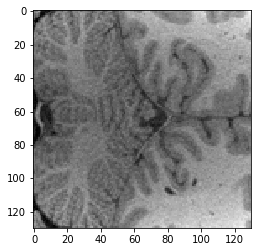

In [0]:
plt.imshow(hr0, cmap='gray')

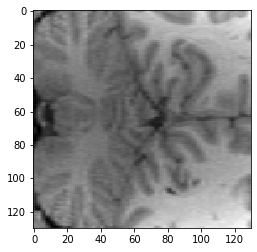

In [0]:
plt.imshow(lr0, cmap='gray')

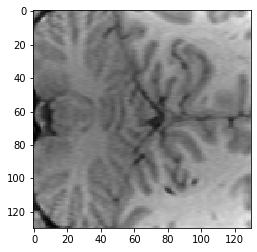

In [0]:
plt.imshow(sr0, cmap='gray')

In [0]:
hr1 = img_data[120,:,:]
lr1 = img_data_lr[120,:,:]
lr1_1 = np.reshape(lr1, (1, hr1.shape[0], hr1.shape[1], 1))
lr1_1.shape

(1, 320, 320, 1)

In [0]:
sr1 = model.predict(lr1_1)
sr1 = np.reshape(sr1,hr1.shape)

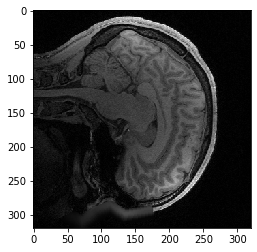

In [0]:
plt.imshow(hr1, cmap='gray')

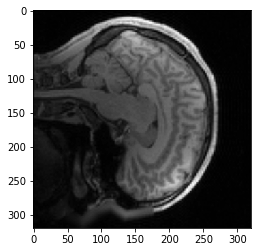

In [0]:
plt.imshow(lr1, cmap='gray')

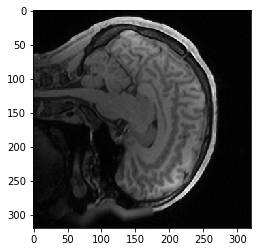

In [0]:
plt.imshow(sr1, cmap='gray')

In [0]:
filepath = 'model_2d_fft.h5'
print(model.save(filepath))

In [0]:
from keras.models import load_model
model = load_model('model_2d_fft.h5')

PSNR and SSIM for test image.

In [0]:
img = nib.load('drive/My Drive/Scans/108525_3T_T1w_MPR1.nii.gz')
img_data = img.get_fdata()
img_data /= img_data.max()
img_data *= 255
img_data = np.array(img_data, dtype='uint8')

img_data_lr = fft_lr(img_data, 2)
img_data_lr = np.array(img_data_lr, dtype='uint8')

hr1 = img_data[113,:,:]
lr1 = img_data_lr[113,:,:]
lr1_1 = np.reshape(lr1, (1, hr1.shape[0], hr1.shape[1], 1))
lr1_1.shape

sr1 = model.predict(lr1_1)
sr1 = np.reshape(sr1,hr1.shape)

print(psnr(hr1, sr1))
s, d = measure.compare_ssim(hr1, sr1, full=True)
print(s)

31.904
0.922699534593078


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)
